In [1]:
import torch
import pandas as pd
import numpy as np
from foolbox.attacks import FGSM, LinfDeepFoolAttack
from mnist_model import ConvNet
from foolbox import PyTorchModel
from source import show, attack_on_model, gaussian, augmentate
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
model = ConvNet()
data = pd.read_csv("train.csv").values
x, y = data[:, 1:], data[:, 0]
model.load_state_dict(torch.load("mnist_weights.pt"))

<All keys matched successfully>

In [3]:
x = x.reshape(len(x), 28, 28)

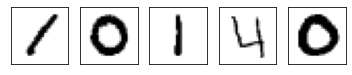

In [4]:
show(x[:5].reshape(5, 784))

In [5]:
model(torch.tensor(x[:5].reshape(5, 1, 28, 28)).float()).argmax(axis=1)

tensor([1, 0, 1, 4, 0])

In [6]:
images = torch.tensor(x.reshape(len(x), 1, 28, 28)).float()
labels = torch.tensor(y)

In [14]:
history_2 = []
for eps in range(1, 100):
    new_labels = attack_on_model(model, images[:100], labels[:100], FGSM(), eps / 5)
    history_2.append(accuracy_score(labels[:100], new_labels))

In [15]:
history = []
for eps in range(1, 100):
    if eps % 20 == 0:
        print(eps)
    new_labels = attack_on_model(model, images[:10], labels[:10], LinfDeepFoolAttack(), eps / 5)
    history.append(accuracy_score(labels[:10], new_labels))

20
40
60
80


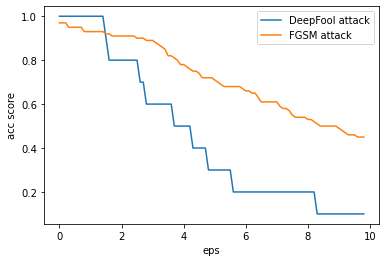

In [17]:
plt.plot([eps / 10 for eps in range(99)], history, label="DeepFool attack")
plt.plot([eps / 10 for eps in range(99)], history_2, label="FGSM attack")
plt.xlabel("eps")
plt.ylabel("acc score")
plt.legend()
plt.show()

In [7]:
model.eval()
attack = LinfDeepFoolAttack()
predicted_labels = model(images[:5]).argmax(axis=1)
fmodel = PyTorchModel(model, bounds=(0, 255))
raw, clipped, is_adv = attack(fmodel, images[:5], labels[:5], epsilons=10)

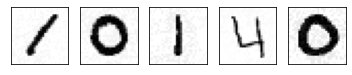

In [8]:
show(raw[:5].reshape(5, 784))

In [9]:
model(raw).argmax(axis=1)

tensor([4, 2, 7, 0, 2])